2022-09-29 11:41:48,873 - INFO - tvb_multiscale.tvb_nest.config - Loading a NEST instance...
2022-09-29 11:41:48,873 - INFO - tvb_multiscale.tvb_nest.config - Loading a NEST instance...
2022-09-29 11:41:48,876 - INFO - tvb_multiscale.tvb_nest.config - NEST_INSTALL_DIR: /home/docker/env/neurosci/nest_build
2022-09-29 11:41:48,876 - INFO - tvb_multiscale.tvb_nest.config - NEST_INSTALL_DIR: /home/docker/env/neurosci/nest_build
2022-09-29 11:41:48,878 - INFO - tvb_multiscale.tvb_nest.config - NEST_DATA_DIR: /home/docker/env/neurosci/nest_build/share/nest
2022-09-29 11:41:48,878 - INFO - tvb_multiscale.tvb_nest.config - NEST_DATA_DIR: /home/docker/env/neurosci/nest_build/share/nest
2022-09-29 11:41:48,881 - INFO - tvb_multiscale.tvb_nest.config - NEST_DOC_DIR: /home/docker/env/neurosci/nest_build/share/doc/nest
2022-09-29 11:41:48,881 - INFO - tvb_multiscale.tvb_nest.config - NEST_DOC_DIR: /home/docker/env/neurosci/nest_build/share/doc/nest
2022-09-29 11:41:48,883 - INFO - tvb_multiscale.tv

Outputs' path: /home/docker/packages/tvb-multiscale/examples/tvb_nest/notebooks/cerebellum/outputs/cwc_FIC
Config (
  title .............................. 'Config gid: 8658bd39-d645-4481-87a4-933905e954fe'
  Type ............................... 'Config'
  gid ................................ UUID('8658bd39-d645-4481-87a4-933905e954fe')
  config.gid ......................... UUID('8658bd39-d645-4481-87a4-933905e954fe')
  config.title ....................... 'Config gid: 8658bd39-d645-4481-87a4-933905e954fe'
  config.log ......................... <Logger tvb_multiscale.tvb_nest.config (DEBUG)>
  config.out ......................... OutputConfig gid: c9166d47-daf2-4cbd-ad47-a3a951688e34
  config.figures ..................... <tvb.simulator.plot.config.FiguresConfig object at 0x7fbe367d65b0>
  config.DEFAULT_SUBJECT[connectivity]  Connectivity gid: de709fcb-ee81-4fc8-bd10-14db9600455c
  config.DEFAULT_SUBJECT[cortex] ..... Cortex gid: 7bb27353-59fe-4ab2-b275-91b948940bed
  config.DEFAULT_S

Normalizing connectivity weights with 99 percentile!
Configuring model with parameters:
OrderedDict([('G', 0.0), ('STIMULUS', 0.5), ('I_e', -0.35), ('I_s', 0.5), ('w_ie', -3.0), ('w_rs', -2.0)])


/home/docker/packages/tvb-multiscale/tvb_multiscale/core/spiking_models/node_set.py:34: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def __init__(self, nodes=pd.Series(), **kwargs):


Fixing thalamocortical weights!
Fixing thalamocortical delays!
2022-09-29 11:41:51,232 - WARNING - tvb_multiscale.core.tvb.cosimulator.cosimulator_serial - Current step is not 0 upon configuration!
Setting it to 0. Initial condition might be affected!


/home/docker/packages/tvb-multiscale/tvb_multiscale/core/spiking_models/devices.py:953: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def __init__(self, device_set=pd.Series(), **kwargs):


Current step is not 0 upon configuration!
Setting it to 0. Initial condition might be affected!


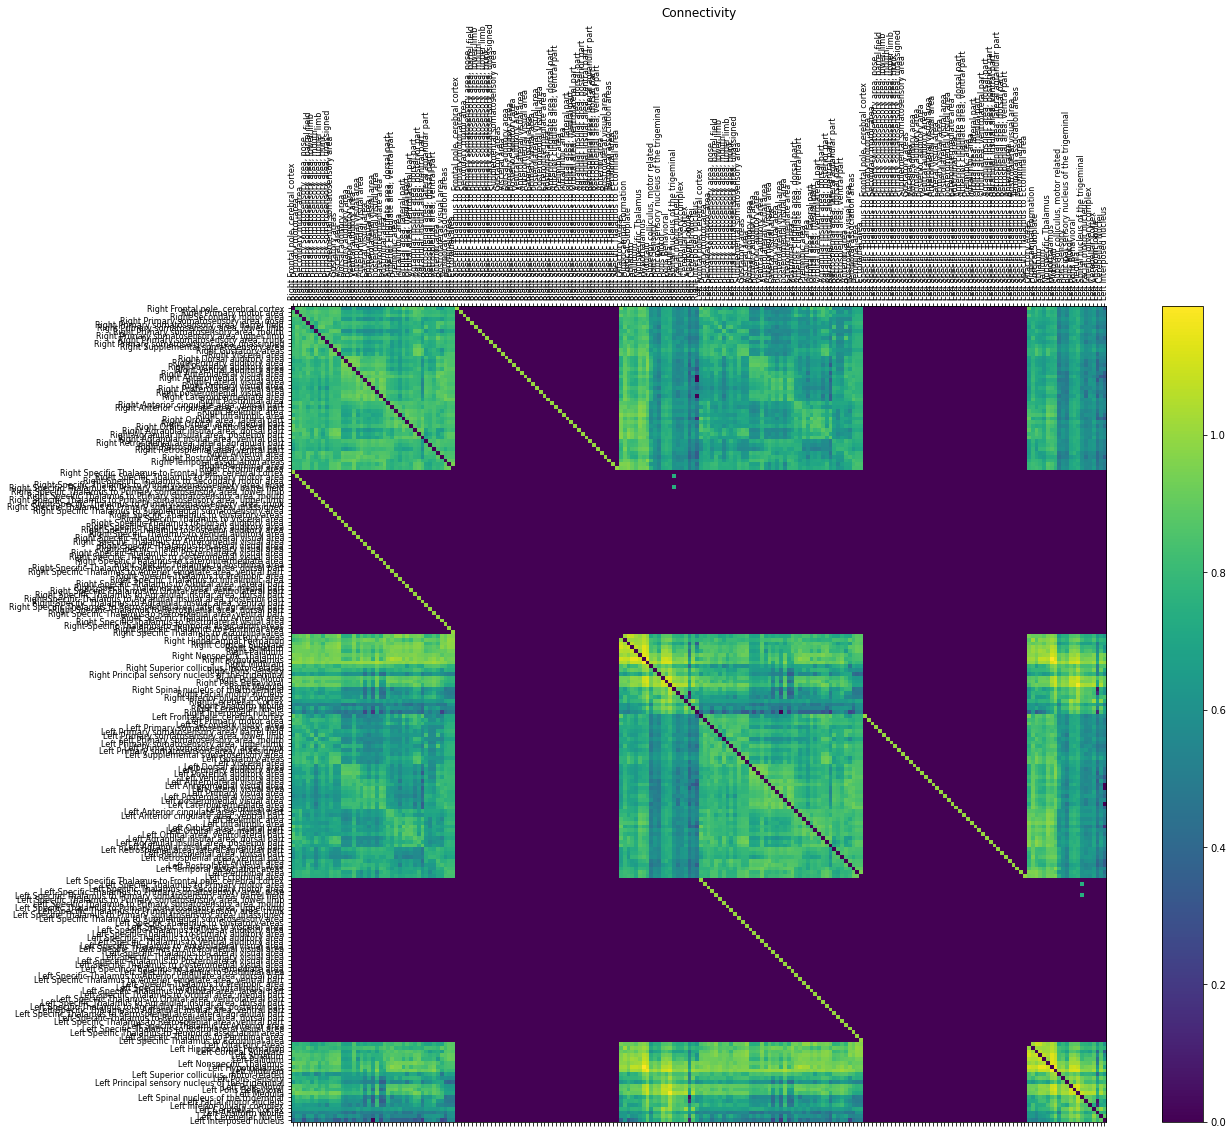

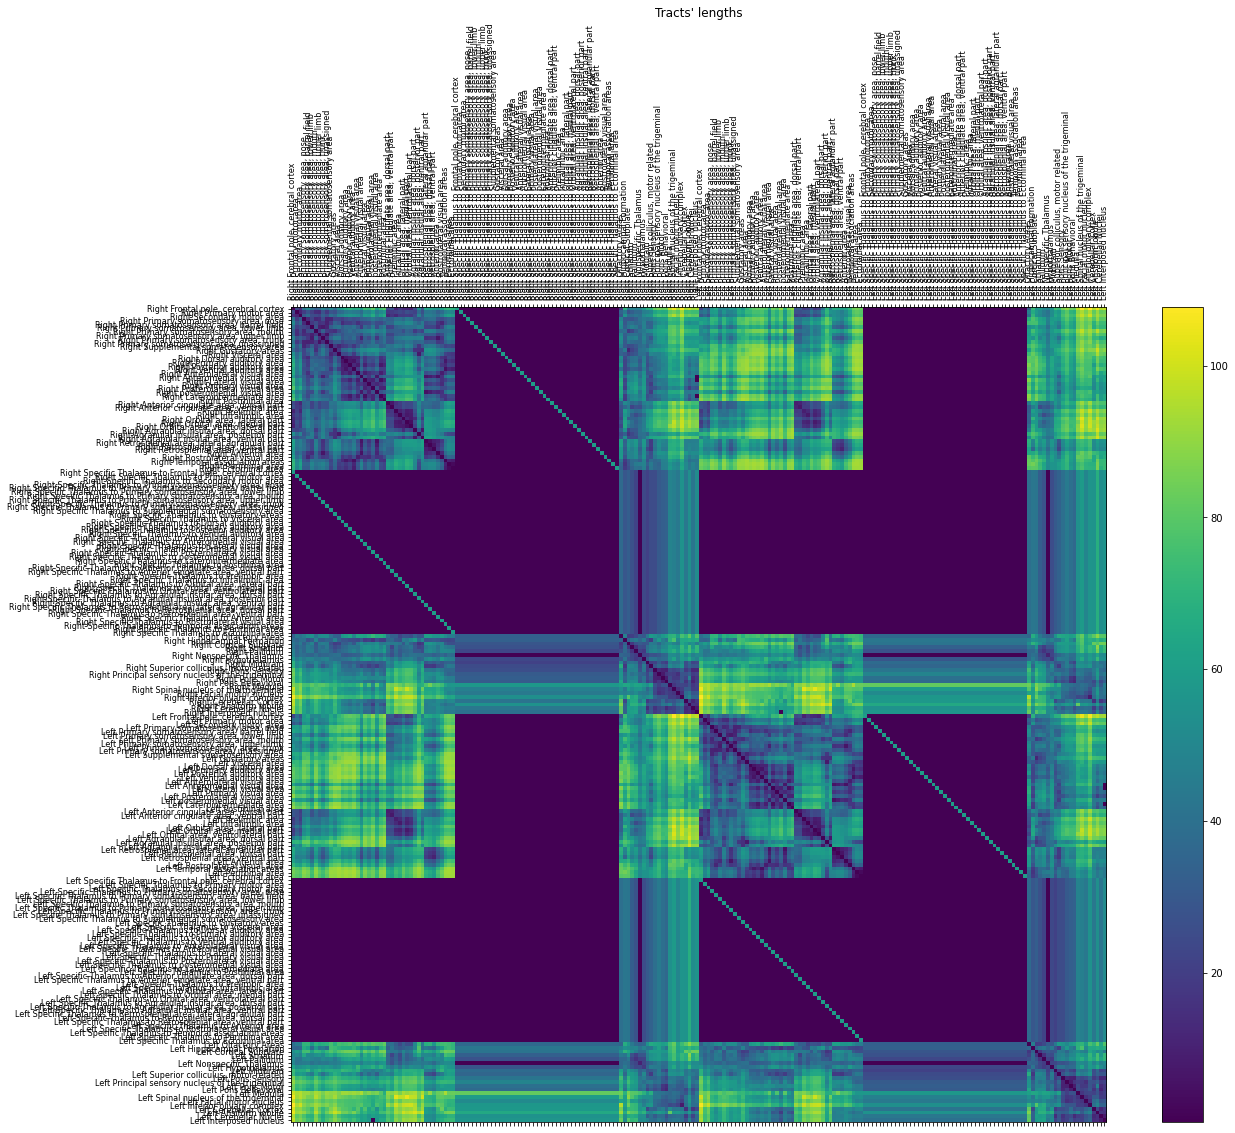

In [1]:
from examples.tvb_nest.notebooks.cerebellum.scripts.scripts import *

model_params={"G": 0.0, 'I_e': -0.35, 'I_s': 0.5}

# Get configuration
config, plotter = assert_config(return_plotter=True, FIC=10, output_folder='cwc')
config.model_params.update(model_params)
# Load and prepare connectome and connectivity with all possible normalizations:
connectome, major_structs_labels, voxel_count, inds, maps = prepare_connectome(config, plotter=plotter)
connectivity = build_connectivity(connectome, inds, config)
# Prepare model
model = build_model(connectivity.number_of_regions, inds, maps, config)
# Prepare simulator
simulator = build_simulator(connectivity, model, inds, maps, config, plotter=plotter)


In [2]:
# Run simulation and get results
results, transient = simulate(simulator, config)


Simulated in 158.055225 secs!


2022-09-29 11:44:59,929 - INFO - tvb.storage.h5.encryption.data_encryption_handler - Cannot import syncrypto library.
Pickle-dumping source_ts to /home/docker/packages/tvb-multiscale/examples/tvb_nest/notebooks/cerebellum/outputs/cwc_FIC/res/source_ts.pkl!


/home/docker/packages/tvb-multiscale/examples/tvb_nest/notebooks/cerebellum/scripts/tvb_script.py:703: UserWarning: Failed to to write source time series to file with error!:
'TimeSeriesRegion' object has no attribute 'connectivity'
  warnings.warn("Failed to to write source time series to file with error!:\n%s" % str(e))


2022-09-29 11:45:06,027 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!
2022-09-29 11:45:06,033 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!
2022-09-29 11:45:06,480 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!
2022-09-29 11:45:06,901 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!
2022-09-29 11:45:07,472 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!
2022-09-29 11:45:07,478 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!
2022-09-29 11:45:07,885 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries lab

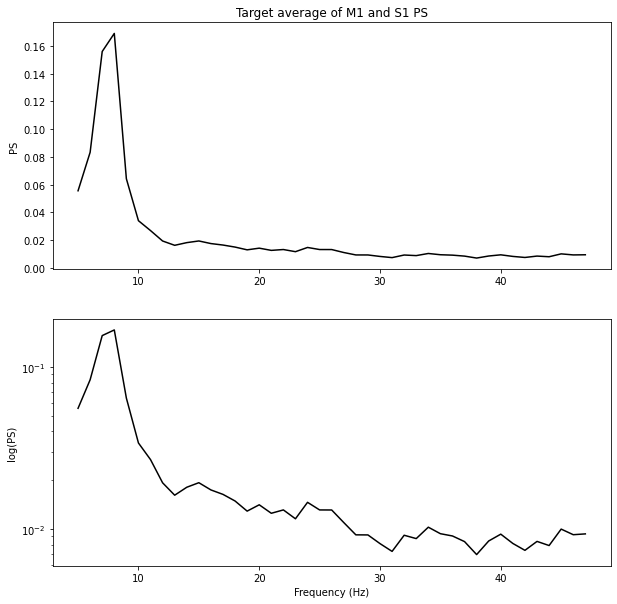

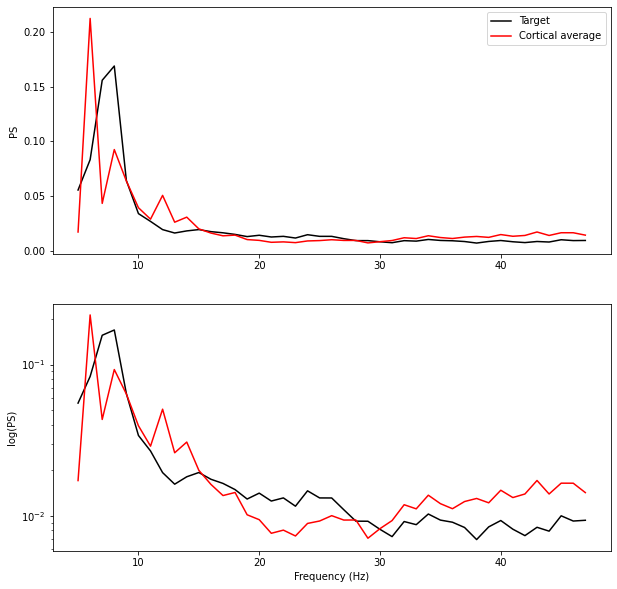

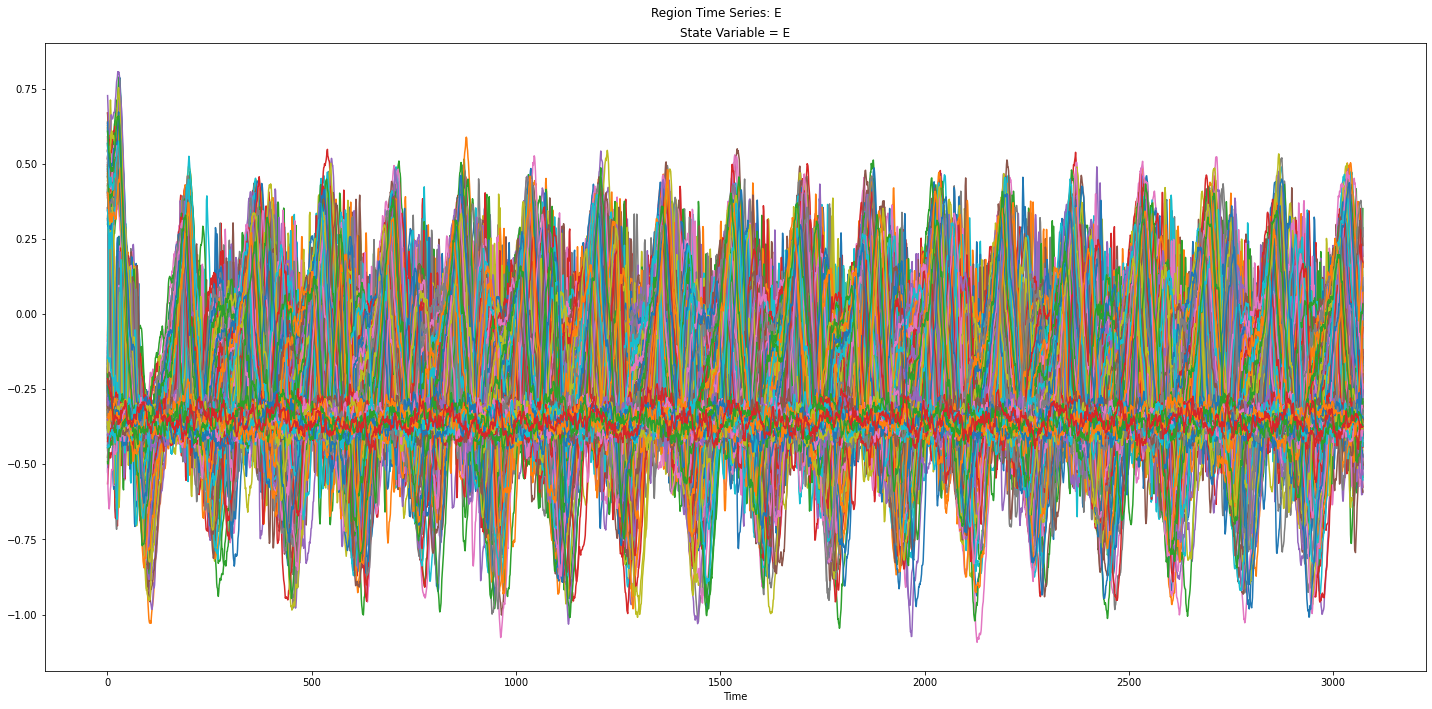

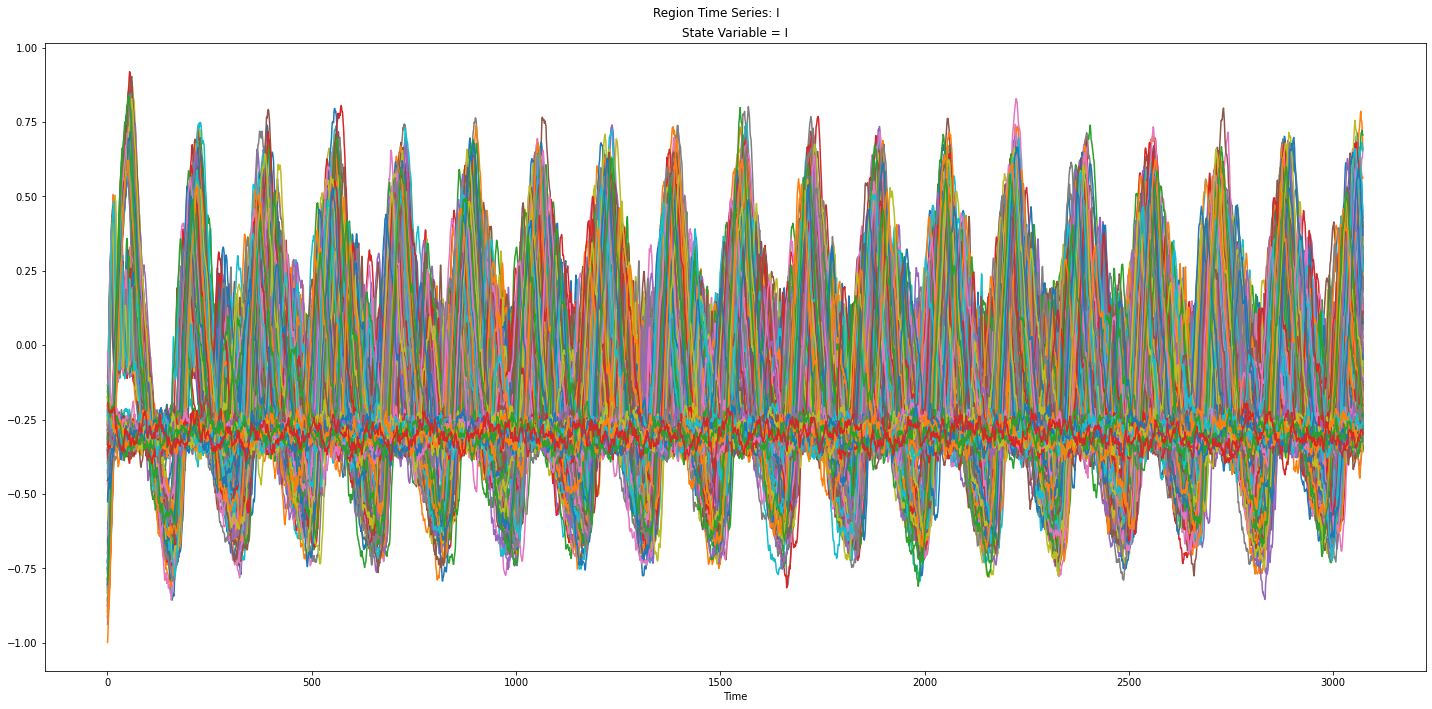

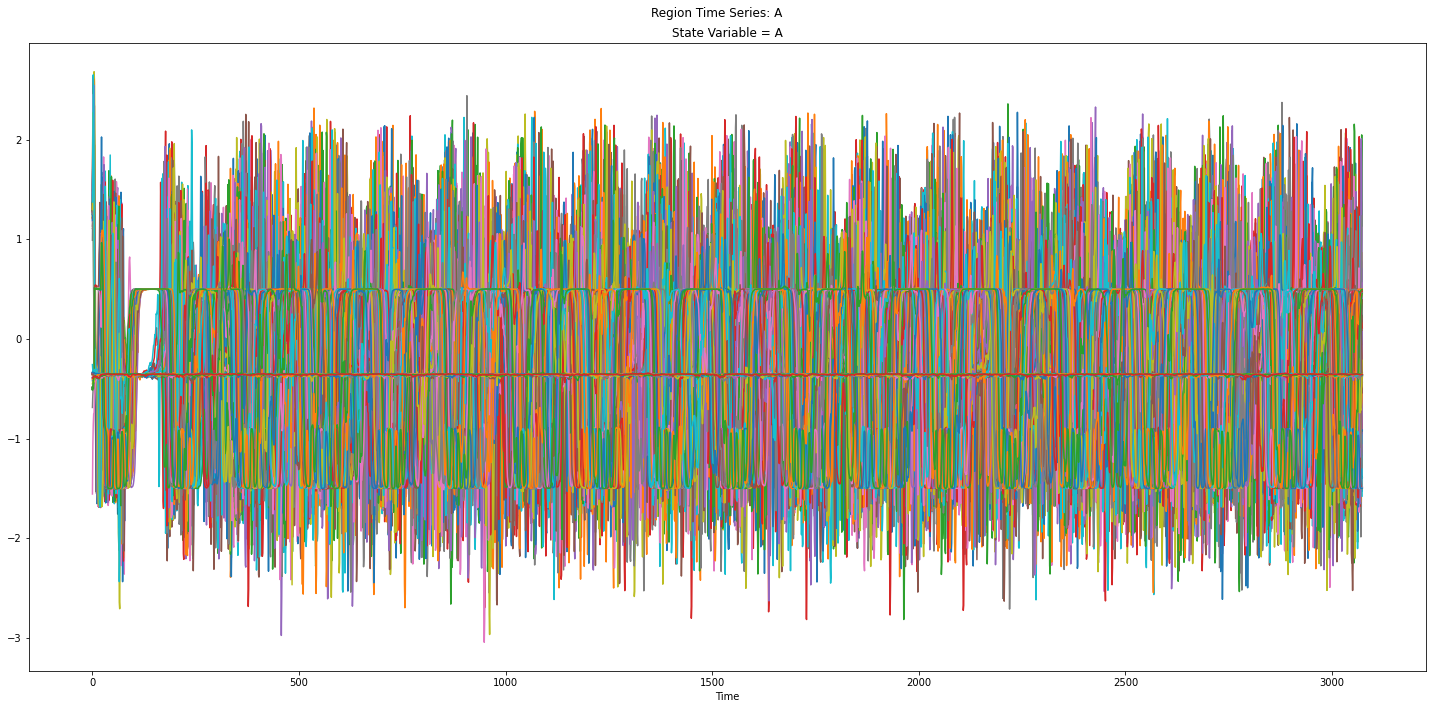

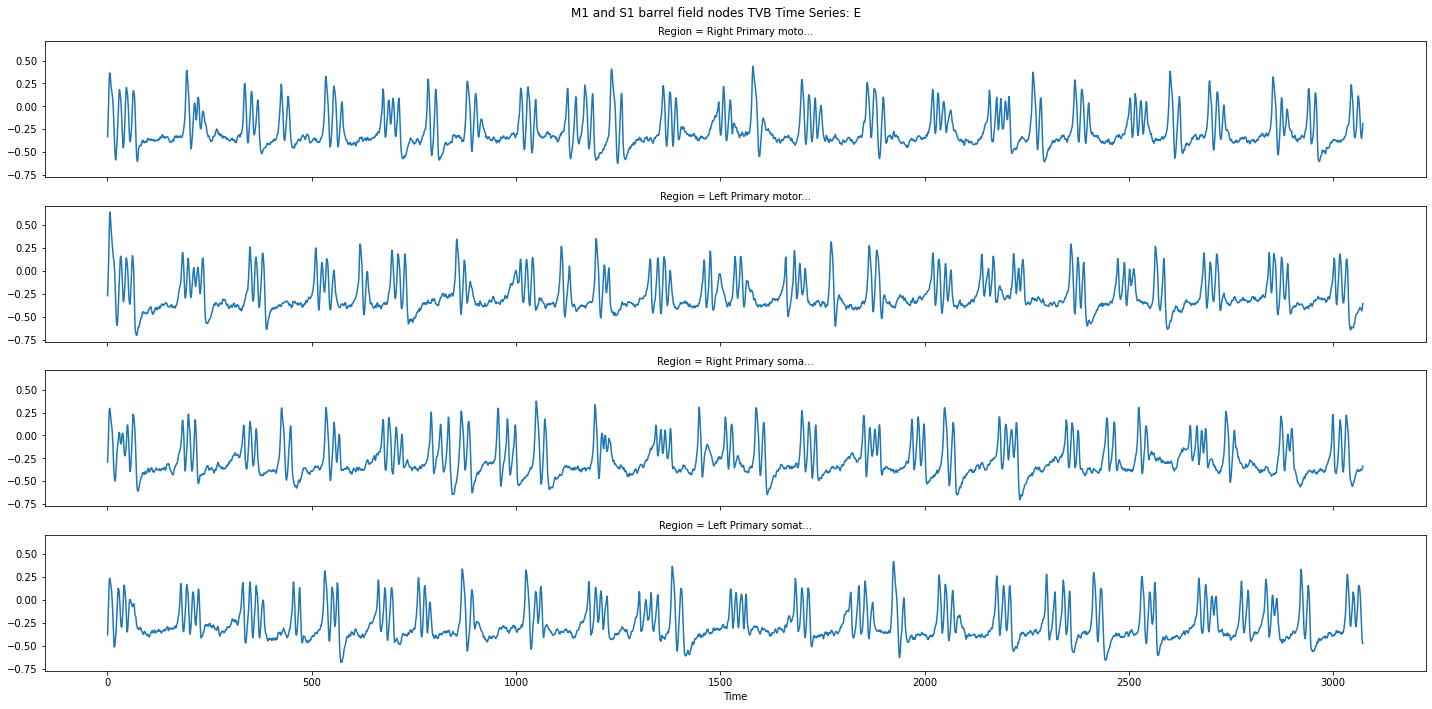

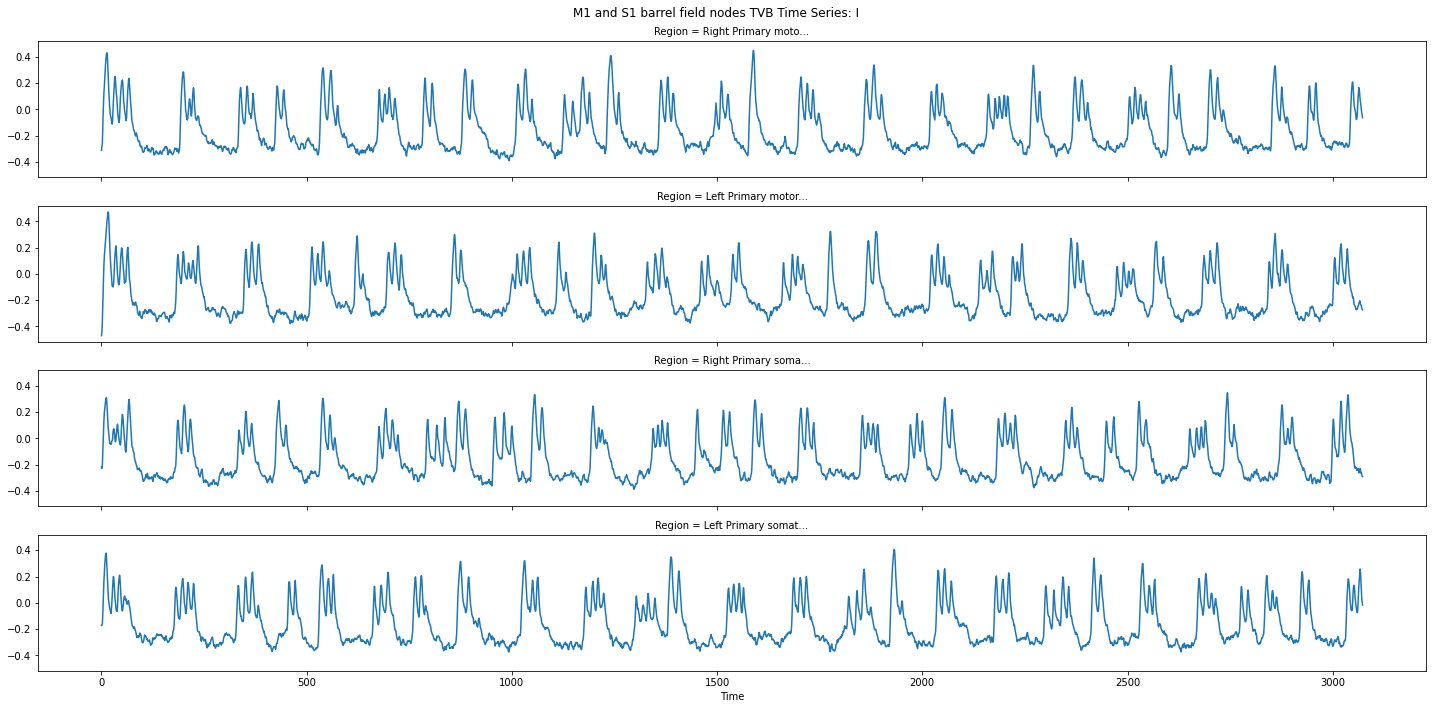

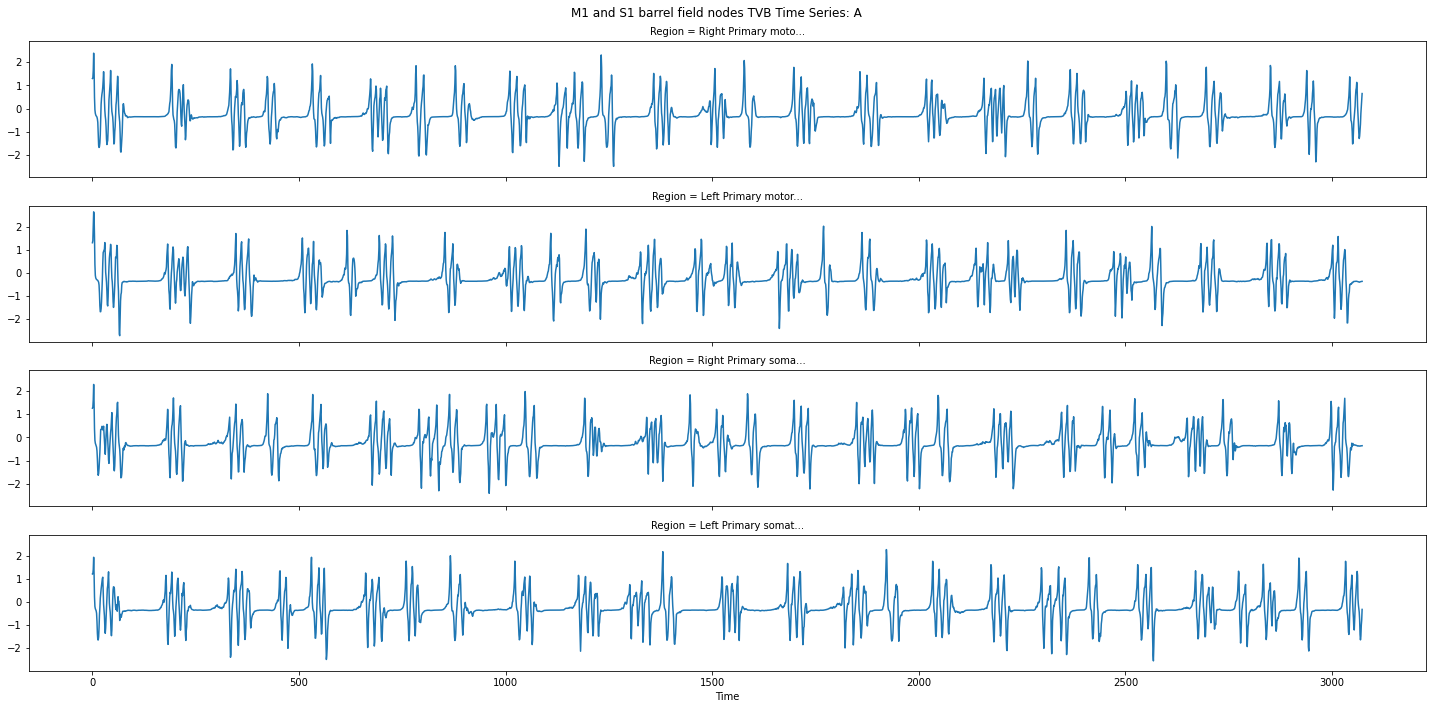

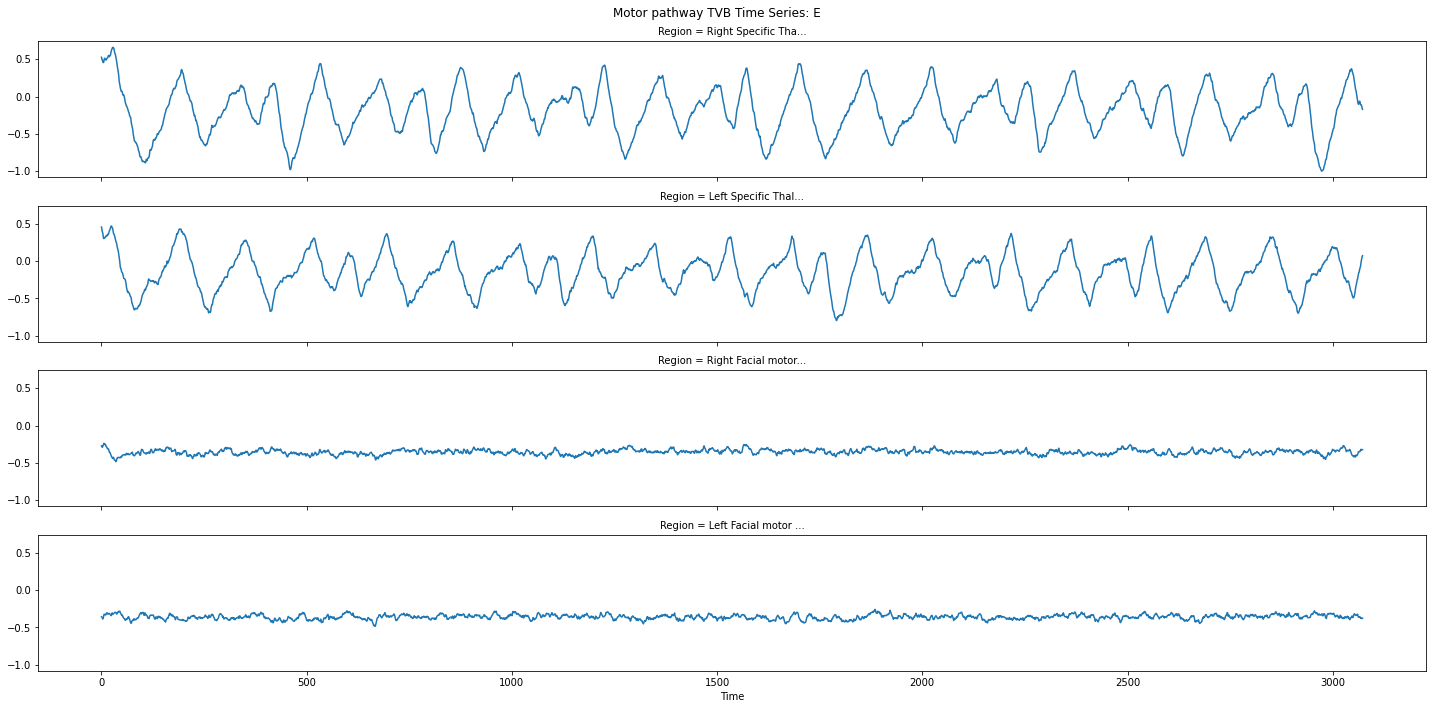

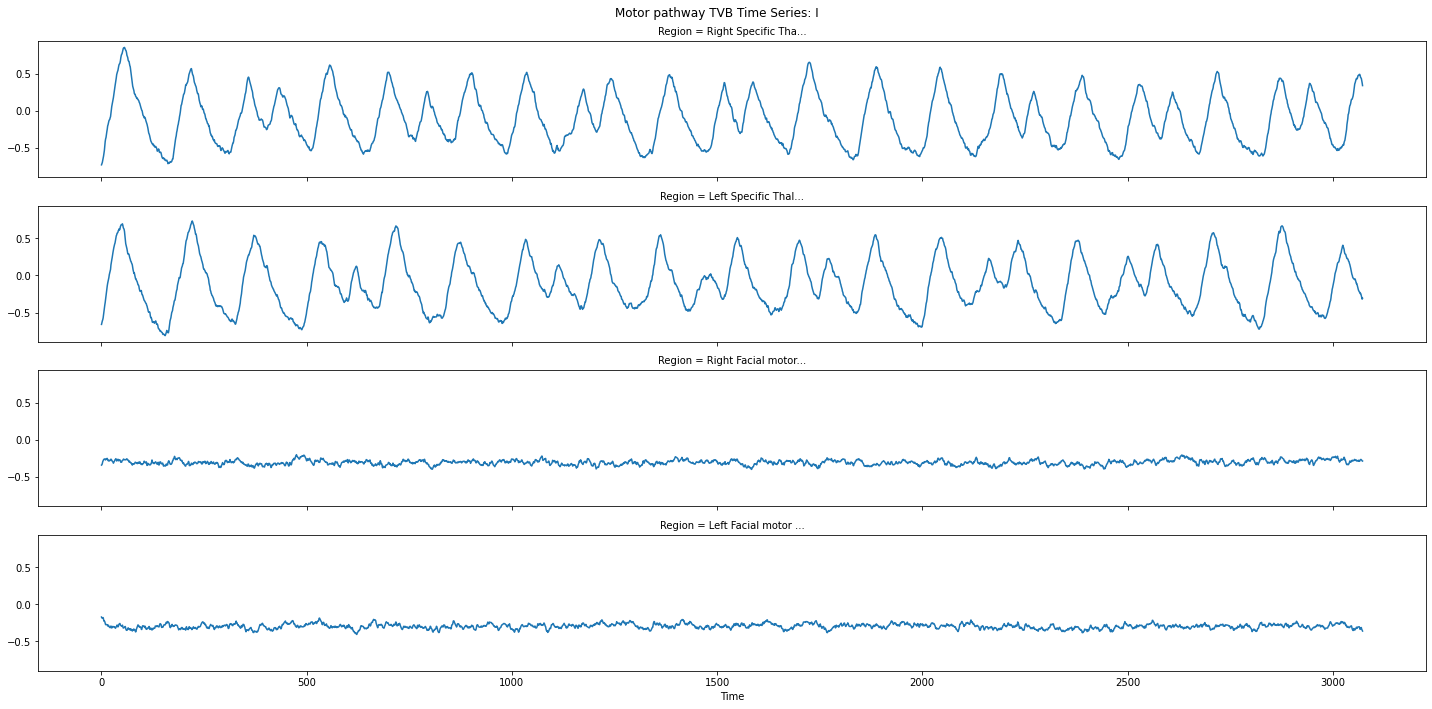

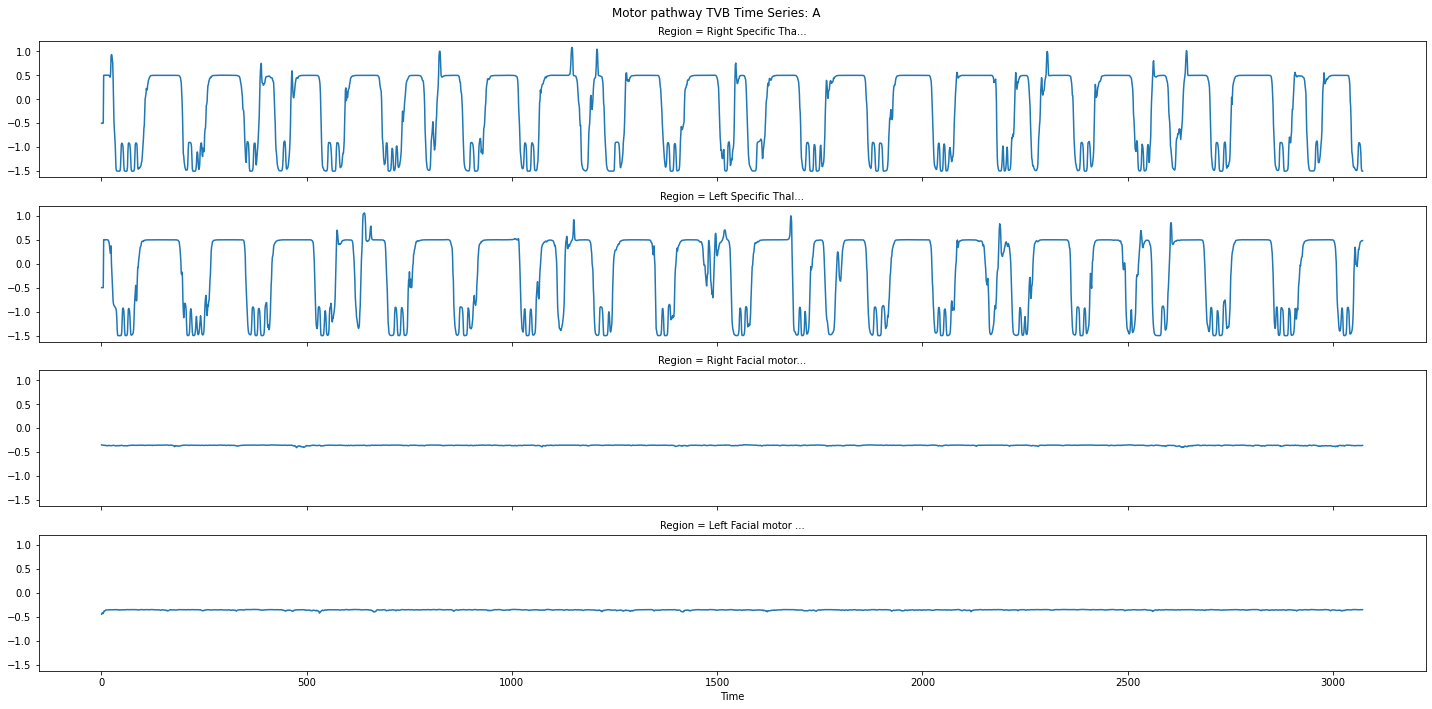

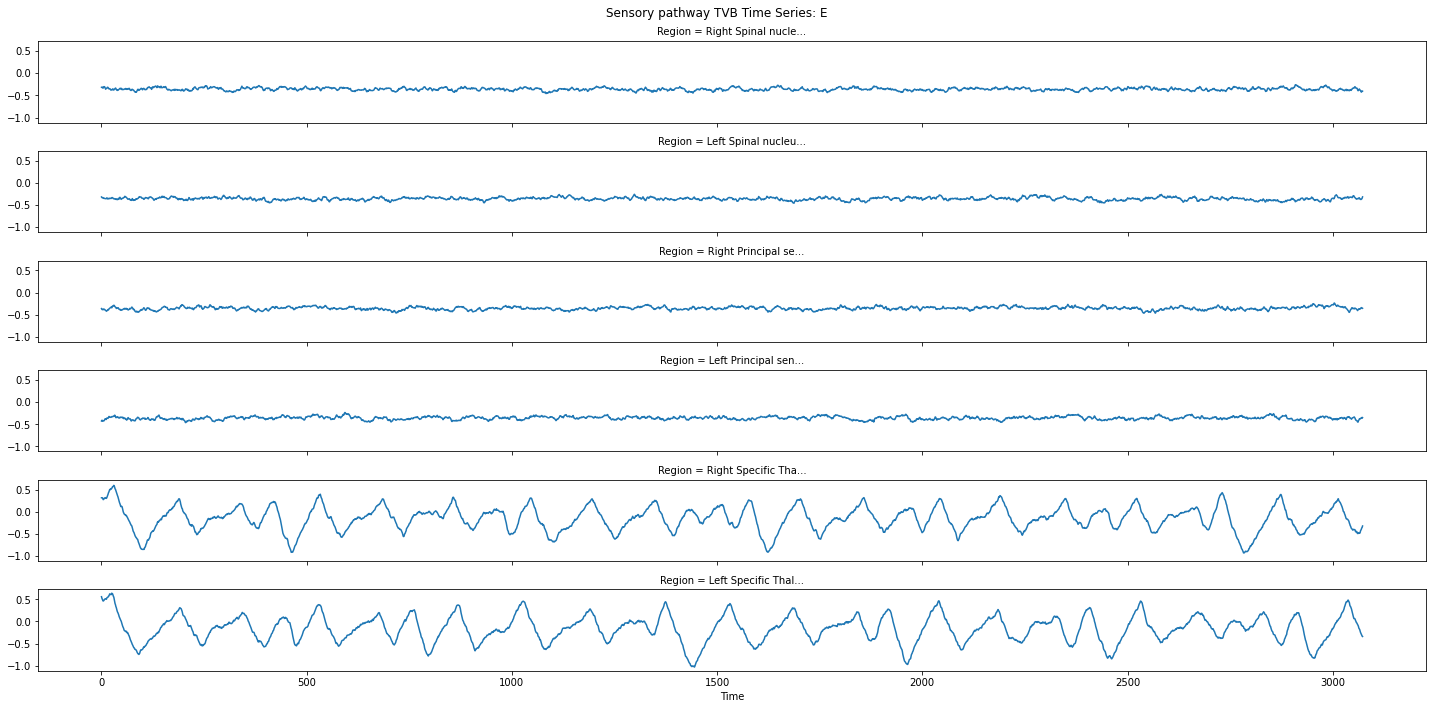

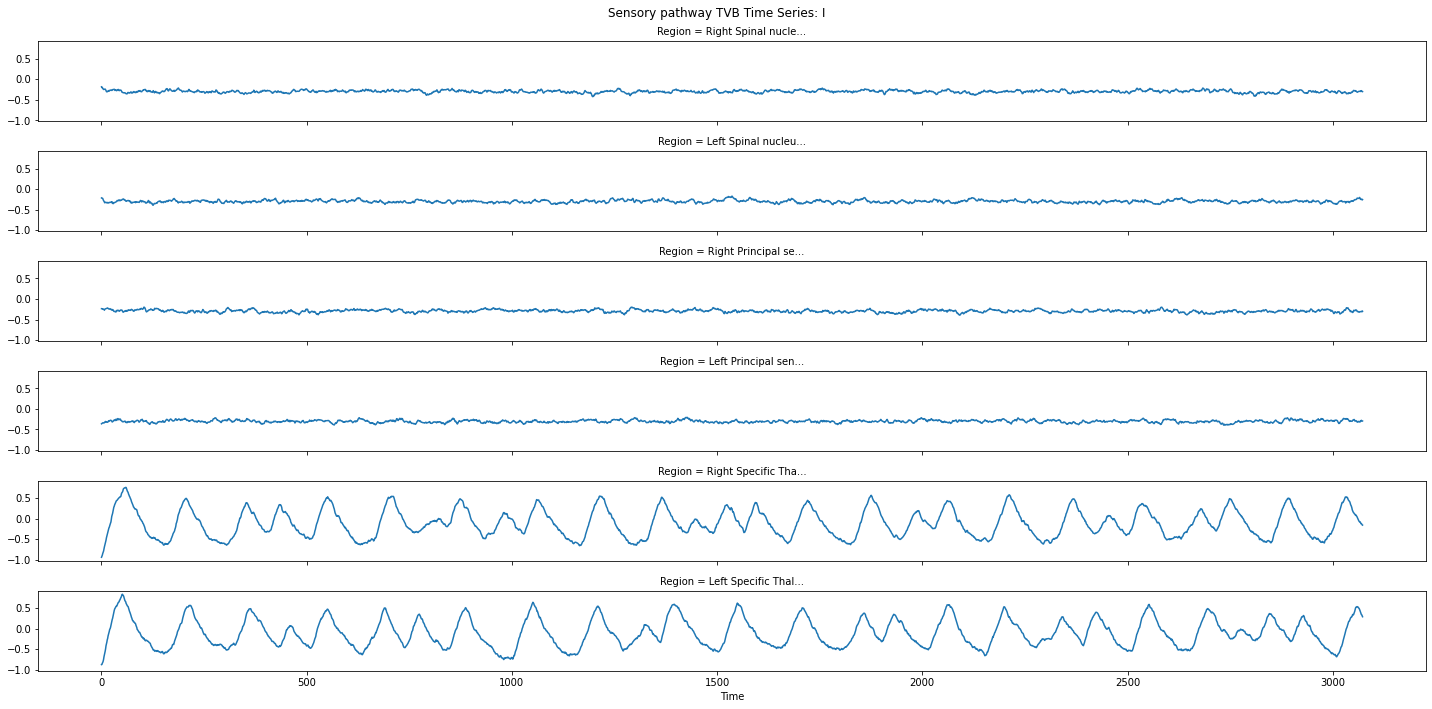

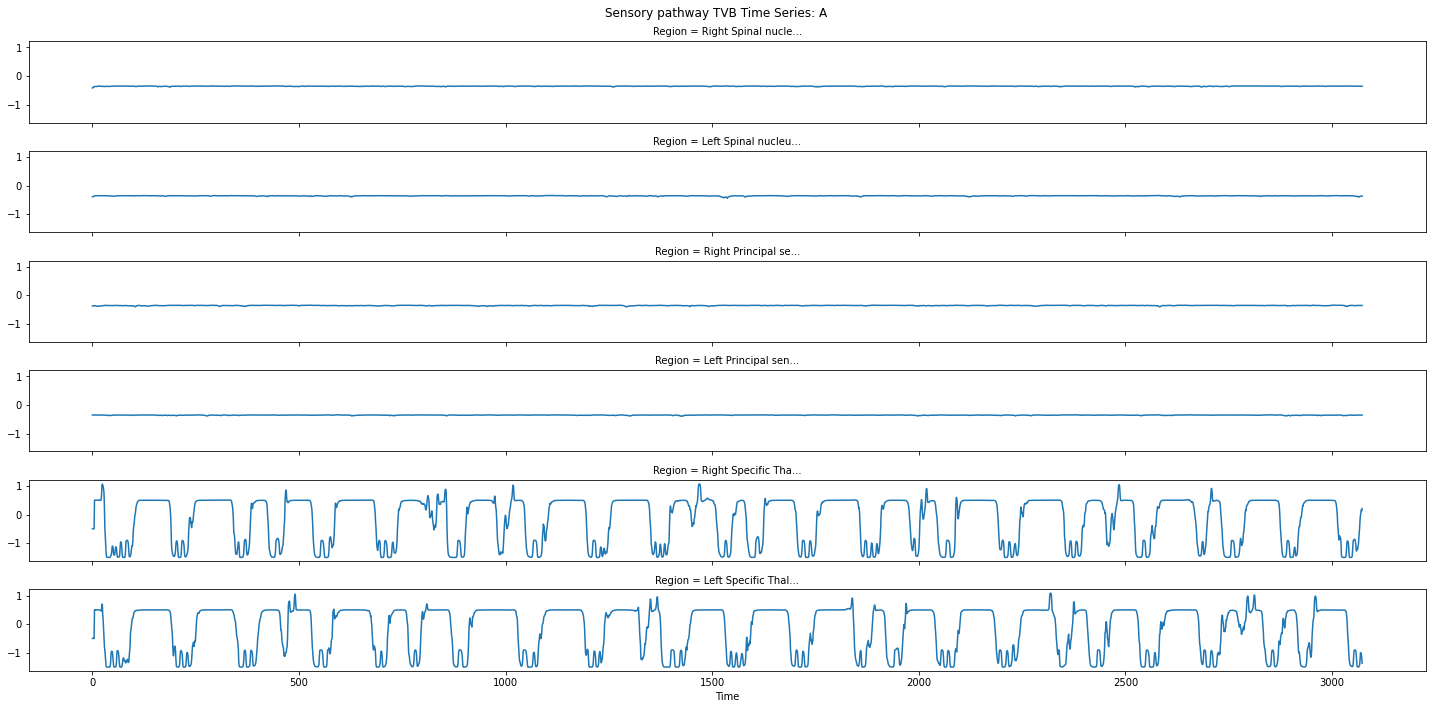

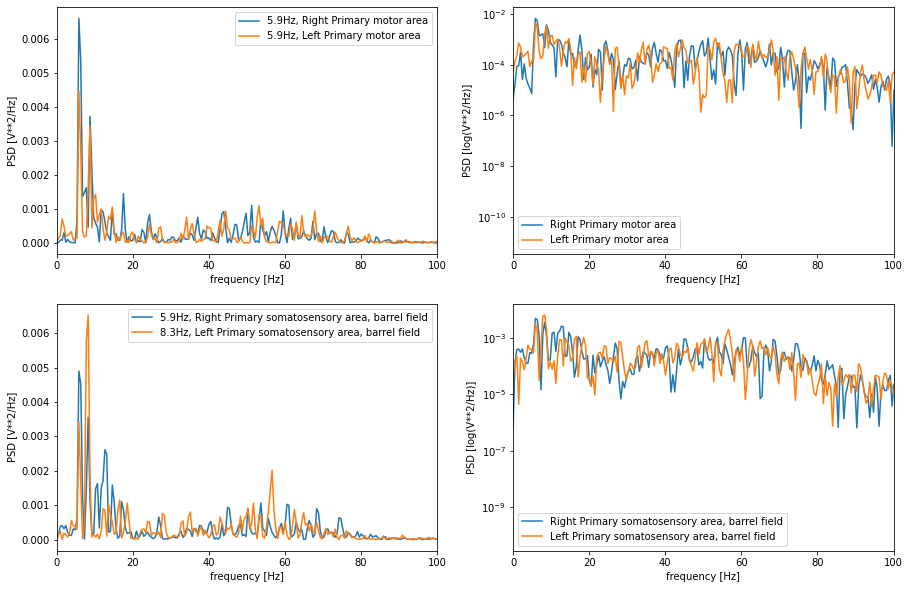

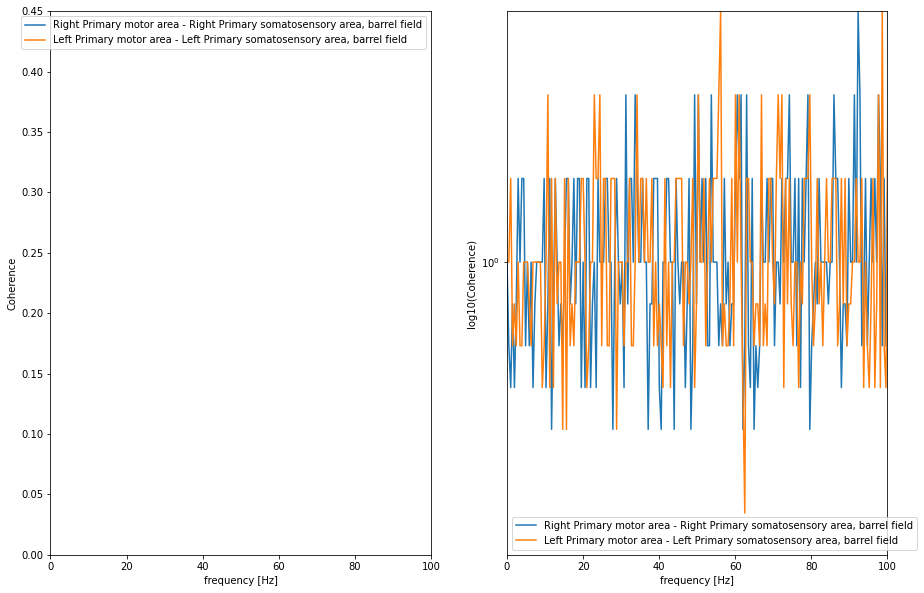

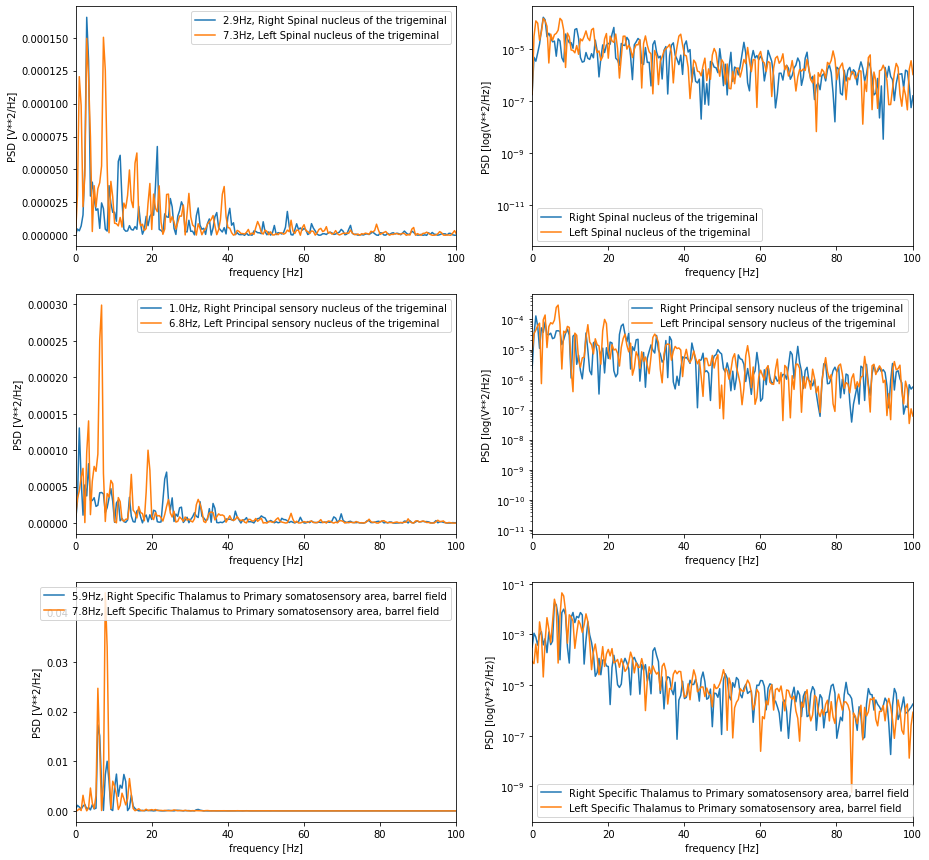

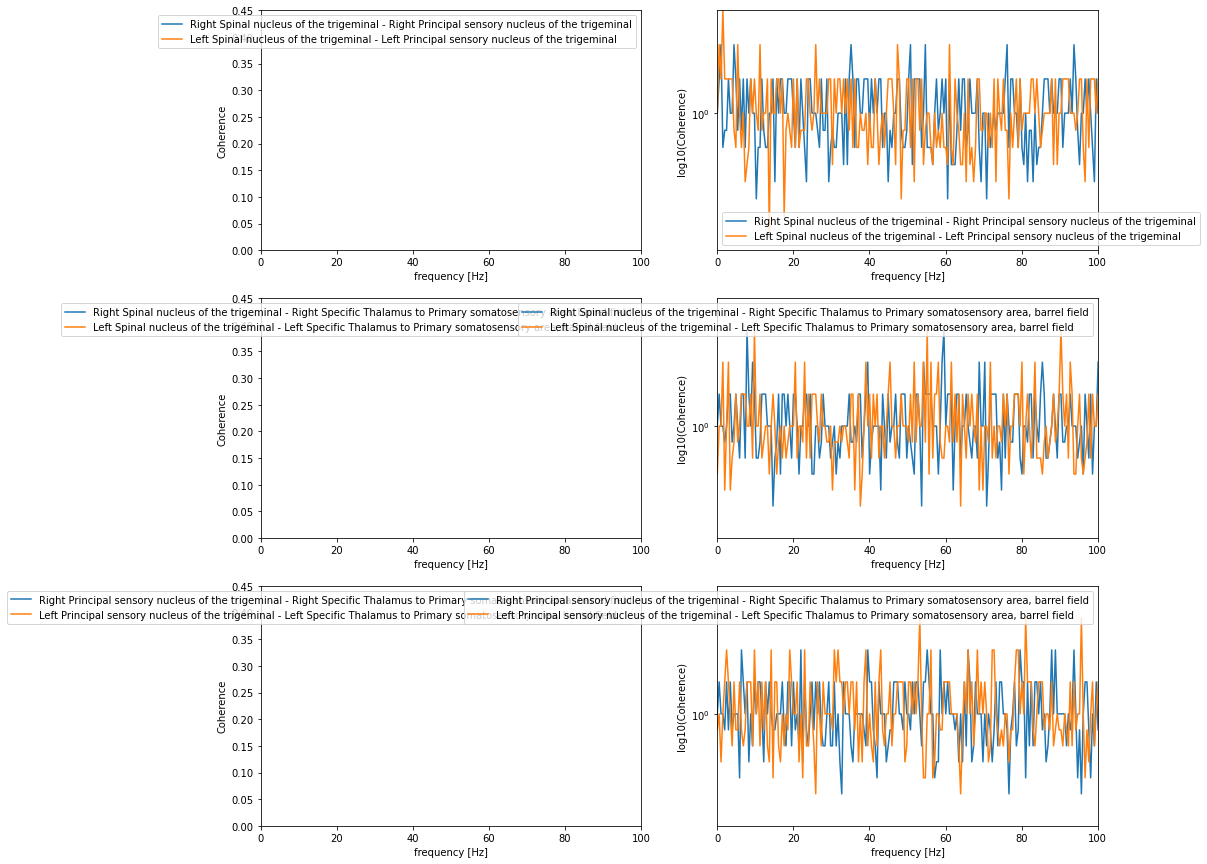

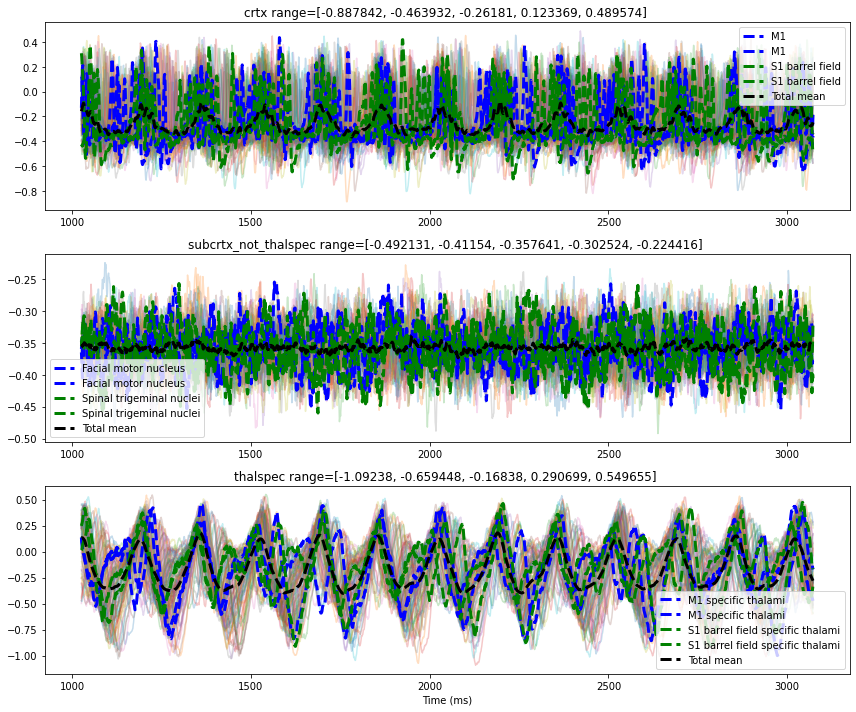

In [3]:
# This is the PSD target we are trying to fit...
if config.model_params['G']:
    # ...for a connected brain, i.e., PS of bilateral M1 and S1:
    PSD_target = compute_target_PSDs_m1s1brl(config, write_files=True, plotter=plotter)
else:
    # ...for a disconnected brain, average PS of all regions:
    PSD_target = compute_target_PSDs_1D(config, write_files=True, plotter=plotter)
# This is the PSD computed from our simulation results...
if config.model_params['G']:
    # ...for a connected brain, i.e., PS of bilateral M1 and S1:
    PSD = compute_data_PSDs_m1s1brl(results[0], PSD_target, inds, transient, plotter=plotter)
else:
    # ...for a disconnected brain, average PS of all regions:
    PSD = compute_data_PSDs_1D(results[0], PSD_target, inds, transient, plotter=plotter)
plot_tvb(transient, inds, results=results, source_ts=None, bold_ts=None,
         simulator=simulator, plotter=plotter, config=config, write_files=True)

In [ ]:
# from examples.tvb_nest.notebooks.cerebellum.scripts.tvb_script import run_workflow
# PSD, results, simulator, config = run_workflow(PSD_target=None, model_params={"G": 2.0, 'I_e': -0.25, 'I_s': 0.25}, config=None, )


In [ ]:
# import dill
# with open('config.pkl', 'wb') as file:
#     dill.dump(config, file, recurse=1)


In [ ]:
# with open('config.pkl', 'rb') as file:
#     config2 = pickle.load(file)

    

In [ ]:
# config2.out.FOLDER_RES

In [ ]:
# # let us run the mean field simulation
# #simulate(simulator, config)
# results, transient = simulate(simulator, config, print_flag=True)

In [ ]:
# from tvb_multiscale.tvb_nest.nest_models.builders.nest_factory import load_nest, configure_nest_kernel
# config = assert_config()
# nest = configure_nest_kernel(load_nest(config=config), config)
# import os
# print(os.environ)
# print(os.listdir('/home/docker/env/neurosci/nest_build/lib/nest'))
# print(nest.Models())

In [ ]:
# from scripts.nest_script import run_nest_workflow
# nest_network = run_nest_workflow(output_folder="nest_only_test")

In [ ]:
config, plotter = configure()
print(config)


In [ ]:
# priors, priors_samples, sim_res = load_priors_and_simulations_for_sbi(1, config=config)
# # priors.support.base_constraint
# from torch.distributions import biject_to
# transform = biject_to(priors.support)
# from torch.distributions import transforms as torch_tf
# #isinstance(transform, torch_tf.IndependentTransform)
# import torch
# theta = priors.sample(torch.Size((2,)))
# print(theta)
# theta_unconstrained = transform.inv(theta)
# print(theta_unconstrained)
# print(transform(theta_unconstrained))
# assert torch.allclose(
#         theta, transform(theta_unconstrained), atol=1e-3  # type: ignore
#     ), "Original and re-transformed parameters must be close to each other."

In [ ]:
for iG in range(1, 9):
    sbi_infer_for_iG(iG, config=config)

In [ ]:
# from scripts.sbi_script import *
# PSD, results, simulator, config, samples_fit = simulate_after_fitting(5, iR=None, config=None)

In [ ]:
samples_fit['G']

In [ ]:
[config.Gs[7], simulator.model.G.mean()]

In [ ]:
[simulator.model.I_e, simulator.model.I_s]

In [ ]:
simulator.model.w_ie

In [ ]:
simulator.model.w_rs

# Plot results and write them to HDF5 files

In [ ]:
from scipy.io import savemat
# set to False for faster plotting of only mean field variables and dates, apart from spikes" rasters:
plot_per_neuron = False  
MAX_VARS_IN_COLS = 2
MAX_REGIONS_IN_ROWS = 10
MIN_REGIONS_FOR_RASTER_PLOT = 9
# from examples.plot_write_results import plot_write_results
# plot_write_results(results, simulator, populations=populations, 
#                    transient=transient, tvb_state_variable_type_label="State Variables", 
#                    tvb_state_variables_labels=simulator.model.variables_of_interest, 
#                    plot_per_neuron=plot_per_neuron, plotter=plotter, config=config)
from tvb_multiscale.core.plot.plotter import Plotter
plotter = Plotter(config.figures)
# Load connectome and other structural files
connectome, major_structs_labels, voxel_count, inds = load_connectome(config, plotter=plotter)
# Construct some more indices and maps
inds, maps = construct_extra_inds_and_maps(connectome, inds)
simulation_length = simulator.simulation_length
transient = simulation_length * (1 + config.TRANSIENT_RATIO) + 0.5
FIGSIZE = config.figures.DEFAULT_SIZE


In [ ]:
# If you want to see what the function above does, take the steps, one by one
try:
    # We need framework_tvb for writing and reading from HDF5 files
    from tvb_multiscale.core.tvb.io.h5_writer import H5Writer
    writer = H5Writer()
except:
    writer = False
    
from tvb.contrib.scripts.datatypes.time_series import TimeSeriesRegion
from tvb.contrib.scripts.datatypes.time_series_xarray import TimeSeriesRegion as TimeSeriesXarray

# Put the results in a Timeseries instance
from tvb.contrib.scripts.datatypes.time_series import TimeSeriesRegion

source_ts = None
bold_ts = None

if results is not None:
    source_ts = TimeSeriesXarray(  # substitute with TimeSeriesRegion fot TVB like functionality
            data=results[0][1], time=results[0][0],
            connectivity=simulator.connectivity,
            labels_ordering=["Time", "State Variable", "Region", "Neurons"],
            labels_dimensions={"State Variable": list(simulator.model.variables_of_interest),
                               "Region": simulator.connectivity.region_labels.tolist()},
            sample_period=simulator.integrator.dt)
    source_ts.configure()

    t = source_ts.time

    # Write to file
    if writer:
        writer.write_tvb_to_h5(TimeSeriesRegion().from_xarray_DataArray(source_ts._data,
                                                                        connectivity=source_ts.connectivity),
                               os.path.join(config.out.FOLDER_RES, source_ts.title)+".h5")
    print("Raw ts:\n%s" % str(source_ts))
    
    if len(results) > 1:
        bold_ts = TimeSeriesXarray(  # substitute with TimeSeriesRegion fot TVB like functionality
                data=results[1][1], time=results[1][0],
                connectivity=simulator.connectivity,
                labels_ordering=["Time", "State Variable", "Region", "Neurons"],
                labels_dimensions={"State Variable": ["BOLD"],
                                   "Region": simulator.connectivity.region_labels.tolist()})
        bold_ts.configure()

        bold_t = source_ts.time

        # Write to file
        if writer:
            writer.write_tvb_to_h5(TimeSeriesRegion().from_xarray_DataArray(bold_ts._data,
                                                                            connectivity=bold_ts.connectivity),
                                   os.path.join(config.out.FOLDER_RES, bold_ts.title)+".h5")
        print("BOLD ts:\n%s" % str(bold_ts))
    

In [ ]:
# Plot TVB time series
if source_ts is not None:
    source_ts[:, :, :, :].plot_timeseries(plotter_config=plotter.config, 
                          hue="Region" if source_ts.shape[2] > MAX_REGIONS_IN_ROWS else None, 
                          per_variable=source_ts.shape[1] > MAX_VARS_IN_COLS, 
                          figsize=FIGSIZE);

In [ ]:
# Focus on the m1 and s1 barrel field nodes: 
if source_ts is not None:
    source_ts_m1s1brl = source_ts[-10000:, :, inds["m1s1brl"]]
    source_ts_m1s1brl.plot_timeseries(plotter_config=plotter.config, 
                                   hue="Region" if source_ts_m1s1brl.shape[2] > MAX_REGIONS_IN_ROWS else None, 
                                   per_variable=source_ts_m1s1brl.shape[1] > MAX_VARS_IN_COLS, 
                                   figsize=FIGSIZE, figname="M1 and S1 barrel field nodes TVB Time Series");

In [ ]:
# Focus on the m1 and s1 barrel field nodes: raster plot
if source_ts is not None and source_ts_m1s1brl.number_of_labels > MIN_REGIONS_FOR_RASTER_PLOT:
    source_ts_m1s1brl.plot_raster(plotter_config=plotter.config, 
                                  per_variable=source_ts_m1s1brl.shape[1] > MAX_VARS_IN_COLS,
                                  figsize=FIGSIZE, figname="M1 and S1 barrel field nodes TVB Time Series Raster");

In [ ]:
# Focus on the the motor pathway: 
if source_ts is not None:
    source_ts_motor = source_ts[-10000:, :, inds["motor"]]
    source_ts_motor.plot_timeseries(plotter_config=plotter.config, 
                                   hue="Region" if source_ts_motor.shape[2] > MAX_REGIONS_IN_ROWS else None, 
                                   per_variable=source_ts_motor.shape[1] > MAX_VARS_IN_COLS, 
                                   figsize=FIGSIZE, figname="Motor pathway TVB Time Series");

In [ ]:
# Focus on the motor pathway: raster plot
if source_ts_motor is not None and source_ts_motor.number_of_labels > MIN_REGIONS_FOR_RASTER_PLOT:
    source_ts_motor.plot_raster(plotter_config=plotter.config, 
                                  per_variable=source_ts_motor.shape[1] > MAX_VARS_IN_COLS,
                                  figsize=FIGSIZE, figname="Motor pathway TVB Time Series Raster");

In [ ]:
# Focus on the sensory pathway: 
if source_ts is not None:
    source_ts_sens = source_ts[-10000:, :, inds["sens"]]
    source_ts_sens.plot_timeseries(plotter_config=plotter.config, 
                                   hue="Region" if source_ts_sens.shape[2] > MAX_REGIONS_IN_ROWS else None, 
                                   per_variable=source_ts_sens.shape[1] > MAX_VARS_IN_COLS, 
                                   figsize=FIGSIZE, figname="Sensory pathway TVB Time Series");

In [ ]:
# Focus on the sensory pathway: raster plot
if source_ts is not None and source_ts_sens.number_of_labels > MIN_REGIONS_FOR_RASTER_PLOT:
    source_ts_sens.plot_raster(plotter_config=plotter.config, 
                               per_variable=source_ts_sens.shape[1] > MAX_VARS_IN_COLS,
                               figsize=FIGSIZE, figname="Sensory pathway TVB Time Series Raster");

In [ ]:
# bold_ts TVB time series
if bold_ts is not None:
    bold_ts.plot_timeseries(plotter_config=plotter.config, 
                            hue="Region" if bold_ts.shape[2] > MAX_REGIONS_IN_ROWS else None, 
                            per_variable=bold_ts.shape[1] > MAX_VARS_IN_COLS, 
                            figsize=FIGSIZE);

In [ ]:
# # Focus on the m1 and s1 barrel field nodes: 
# if bold_ts is not None:
#     bold_ts_m1s1brl = bold_ts[-10000:, :, inds["m1s1brl"]]
#     bold_ts_m1s1brl.plot_timeseries(plotter_config=plotter.config, 
#                                     hue="Region" if bold_ts_m1s1brl.shape[2] > MAX_REGIONS_IN_ROWS else None, 
#                                     per_variable=bold_ts_m1s1brl.shape[1] > MAX_VARS_IN_COLS, 
#                                     figsize=FIGSIZE, figname="M1 and S1 barrel field nodes BOLD Time Series");

In [ ]:
# # Focus on the m1 and s1 barrel field nodes: raster plot
# if bold_ts is not None and bold_ts_m1s1brl.number_of_labels > MIN_REGIONS_FOR_RASTER_PLOT:
#     bold_ts_m1s1brl.plot_raster(plotter_config=plotter.config, 
#                                 per_variable=bold_ts_m1s1brl.shape[1] > MAX_VARS_IN_COLS,
#                                 figsize=FIGSIZE, figname="M1 and S1 barrel field nodes BOLD Time Series Raster");

In [ ]:
# # Focus on the the motor pathway: 
# if bold_ts is not None:
#     bold_ts_motor = bold_ts[-10000:, :, inds["motor"]]
#     bold_ts_motor.plot_timeseries(plotter_config=plotter.config, 
#                                    hue="Region" if bold_ts_motor.shape[2] > MAX_REGIONS_IN_ROWS else None, 
#                                    per_variable=bold_ts_motor.shape[1] > MAX_VARS_IN_COLS, 
#                                    figsize=FIGSIZE, figname="Motor pathway BOLD Time Series");

In [ ]:
# # Focus on the motor pathway: raster plot
# if bold_ts is not None and bold_ts_motor.number_of_labels > MIN_REGIONS_FOR_RASTER_PLOT:
#     bold_ts_motor.plot_raster(plotter_config=plotter.config, 
#                               per_variable=bold_ts_motor.shape[1] > MAX_VARS_IN_COLS,
#                               figsize=FIGSIZE, figname="Motor pathway BOLD Time Series Raster");

In [ ]:
# # Focus on the sensory pathway: 
# if bold_ts is not None:
#     bold_ts_sens = bold_ts[-10000:, :, inds["sens"]]
#     bold_ts_sens.plot_timeseries(plotter_config=plotter.config, 
#                                  hue="Region" if bold_ts_sens.shape[2] > MAX_REGIONS_IN_ROWS else None, 
#                                  per_variable=bold_ts_sens.shape[1] > MAX_VARS_IN_COLS, 
#                                  figsize=FIGSIZE, figname="Sensory pathway BOLD Time Series");

In [ ]:
# # Focus on the sensory pathway: raster plot
# if bold_ts is not None and bold_ts_sens.number_of_labels > MIN_REGIONS_FOR_RASTER_PLOT:
#     bold_ts_sens.plot_raster(plotter_config=plotter.config, 
#                              per_variable=bold_ts_sens.shape[1] > MAX_VARS_IN_COLS,
#                              figsize=FIGSIZE, figname="Sensory pathway BOLD Time Series Raster");

### Interactive time series plot

In [ ]:
# # ...interactively as well
# # For interactive plotting:
# %matplotlib notebook 
# plotter.plot_timeseries_interactive(source_ts)

In [ ]:
# # For interactive plotting:
# %matplotlib notebook  


# from tvb.datatypes.time_series import TimeSeries
# from tvb.contrib.scripts.plot.power_spectra_interactive import PowerSpectraInteractive

# tsr = TimeSeries(data=source_ts[1000:, 0, inds["m1s1brl"]]._data.values, sample_period=source_ts.sample_period)
# psi = PowerSpectraInteractive()
# psi.time_series = tsr
# psi.window_length = 1000.0
# psi.show()
# from ipywidgets import interact, widgets as ip_widgets
# from IPython.display import display

# textRegions = ip_widgets.Text(
#     value='',
#     placeholder='Regions Slicer',
#     description='start:stop:step',
#     disabled=False
# )

# textFreqs = ip_widgets.Text(
#     value='',
#     placeholder='Frequency Range',
#     description='f_min, f_max',
#     disabled=False
# )

# def callbackRegions(wdgt):
#     # replace by something useful
#     psi.update_regions(wdgt.value)

# def callbackFreqs(wdgt):
#     # replace by something useful
#     psi.update_freq_range(wdgt.value)
    
# textRegions.on_submit(callbackRegions)
# textFreqs.on_submit(callbackFreqs)

# display(textRegions)
# display(textFreqs)



# Compute data and target PSDs and compare:


In [ ]:
PSD_target = compute_target_PSDs(config, write_files=True, plotter=plotter)

In [ ]:
PSD = compute_data_PSDs(results[0], PSD_target, inds, transient, write_files=False, plotter=plotter)

In [ ]:
%matplotlib inline 

from examples.tvb_nest.notebooks.cerebellum.utils import  compute_plot_selected_spectra_coherence, compute_plot_ica

NPERSEG = np.array([256, 512, 1024, 2048, 4096])
NPERSEG = NPERSEG[np.argmin(np.abs(NPERSEG - (source_ts.shape[0]-transient/config.DEFAULT_DT)))]

# Power Spectra and Coherence for M1 - S1 barrel field
CxyR, fR, fL, CxyL =compute_plot_selected_spectra_coherence(source_ts, inds["m1s1brl"], 
                                        transient=transient, nperseg=NPERSEG, fmin=0.0, fmax=100.0)

In [ ]:
import pickle

with open('coherence_MF_cerebON_2sec.pickle', 'wb') as handle:
    pickle.dump([CxyR, fR, fL, CxyL], handle)

In [ ]:
# Power Spectra and Coherence along the sensory pathway:
# for Medulla SPV, Sensory PONS
compute_plot_selected_spectra_coherence(source_ts, inds["sens"], 
                                        transient=transient, nperseg=NPERSEG, fmin=0.0, fmax=100.0)

In [ ]:
plotter.config.DEFAULT_SIZE = (12, 10)  # FIGSIZE
if source_ts is not None:
    # LFP (E) ICA:
    lfp_ica_comps, lfp_ics_ts, lfp_ica = compute_plot_ica(source_ts[transient:].data[:, 0, :, 0].squeeze(), 
                                                          source_ts[transient:].time,
                                                          variable="LFP", n_components=10, plotter=plotter)
    

In [ ]:
if bold_ts is not None:    
    # BOLD ICA:
    bold_ica_comps, bold_ics_ts, bold_ica = compute_plot_ica(bold_ts.data[:, 0, :, 0].squeeze(), bold_ts.time,
                                                             variable="BOLD", n_components=10, plotter=plotter)
    

# References

1 Sanz Leon P, Knock SA , Woodman MM, Domide L, <br>
  Mersmann J, McIntosh AR, Jirsa VK. 2013. <br>
  The Virtual Brain: a simulator of primate brain network dynamics. <br>
  Frontiers in Neuroinformatics (7:10. doi: 10.3389/fninf.2013.00010) <br>
  https://www.thevirtualbrain.org/tvb/zwei <br>
  https://github.com/the-virtual-brain <br>

2 Ritter P, Schirner M, McIntosh AR, Jirsa VK. 2013.  <br>
  The Virtual Brain integrates computational modeling and multimodal neuroimaging. <br>
  Brain Connectivity 3:121–145. <br>

3 Griffiths JD, McIntosh AR, Lefebvre J. 2020.   <br>
  A Connectome-Based, Corticothalamic Model of State- <br>
  and Stimulation-Dependent Modulation of Rhythmic Neural Activity and Connectivity <br>
  Frontiers in Computational Neuroscience (vol. 14. doi: 10.3389/fncom.2020.575143) <br>
  https://www.frontiersin.org/articles/10.3389/fncom.2020.575143/full#h12
  
4 Jordan, Jakob; Mørk, Håkon; Vennemo, Stine Brekke;   Terhorst, Dennis; Peyser, <br>
  Alexander; Ippen, Tammo; Deepu, Rajalekshmi;   Eppler, Jochen Martin; <br>
  van Meegen, Alexander;   Kunkel, Susanne; Sinha, Ankur; Fardet, Tanguy; Diaz, <br>
  Sandra; Morrison, Abigail; Schenck, Wolfram; Dahmen, David;   Pronold, Jari; <br>
  Stapmanns, Jonas;   Trensch, Guido; Spreizer, Sebastian;   Mitchell, Jessica; <br>
  Graber, Steffen; Senk, Johanna; Linssen, Charl; Hahne, Jan; Serenko, Alexey; <br>
  Naoumenko, Daniel; Thomson, Eric;   Kitayama, Itaru; Berns, Sebastian;   <br>
  Plesser, Hans Ekkehard <br>
  NEST is a simulator for spiking neural network models that focuses <br>
  on the dynamics, size and structure of neural systems rather than on <br>
  the exact morphology of individual neurons. <br>
  For further information, visit http://www.nest-simulator.org. <br>
  The release notes for this release are available at  <br>
  https://github.com/nest/nest-simulator/releases/tag/v2.18.0 <br>

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

data = source_ts.data
time = source_ts.time

fig, axes = plt.subplots(3, 1, figsize=(12, 10))
for iT, regs in enumerate(["crtx", "subcrtx_not_thalspec", "thalspec"]):
    transient_in_points = int((transient+0.5)/simulator.monitors[0].period)
    dat = data[transient_in_points:, 0, inds[regs]].squeeze()
    print(dat.shape)
    axes[iT].plot(time[transient_in_points:], dat, alpha=0.25)
    if iT == 0:
        axes[iT].plot(time[transient_in_points:], data[transient_in_points:, 0, inds["m1"]].squeeze(), 
                      'b--', linewidth=3, label='M1')
        axes[iT].plot(time[transient_in_points:], data[transient_in_points:, 0, inds["s1brl"]].squeeze(), 
                      'g--', linewidth=3, label='S1 barrel field')
    elif iT == 1:
        axes[iT].plot(time[transient_in_points:], data[transient_in_points:, 0, inds["facial"]].squeeze(), 
                      'b--', linewidth=3, label='Facial motor nucleus')
        axes[iT].plot(time[transient_in_points:], data[transient_in_points:, 0, inds["trigeminal"]].squeeze(), 
                      'g--', linewidth=3, label='Spinal trigeminal nuclei')
    else:
        axes[iT].plot(time[transient_in_points:], data[transient_in_points:, 0, [44, 166]].squeeze(), 
                      'b--', linewidth=3, label='M1 specific thalami')
        axes[iT].plot(time[transient_in_points:], data[transient_in_points:, 0, [47, 169]].squeeze(), 
                      'g--', linewidth=3, label='S1 barrel field specific thalami')
        axes[iT].set_xlabel('Time (ms)')
    axes[iT].plot(time[transient_in_points:], dat.mean(axis=1), 'k--', linewidth=3, label='Total mean')
    axes[iT].legend()
    axes[iT].set_title("%s range=[%g, %g, %g, %g, %g] " % 
                       (regs, dat.min(), np.percentile(dat, 5), dat.mean(), np.percentile(dat, 95), dat.max()))
fig.tight_layout()